### Name: Tai Ngo
### DSC-680: Data Science Application

### Using Sentiment Analysis on Finviz Articles about Stocks

#### Skills: Web Scraping, Data Analysis, Data Visualization

In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

#### Stocks: S&P 500 ETF (SPY), Techology ETF (TQQQ), Gold Index (GOLD)

In [2]:
# get the data from finviz for three tickers: SPY, TQQQ and VIXY

fv_url = 'https://finviz.com/quote.ashx?t='
tickers = ['QQQ', 'GOLD', 'SPY']

table_news = {}

for symbol in tickers:
    url = fv_url + symbol
    
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    table_news[symbol] = news_table

#### Parse and Manipulate the Data

In [3]:
# append values into parsed_
parsed_ = []

for symbol, news_table in table_news.items():
    for r in news_table.findAll('tr'):
        contents = r.a.get_text()
        date_ = r.td.text.split(' ')
        
        if len(date_) == 1:
            time = date_[0]
        else:
            date = date_[0]
            time = date_[1]
            
        parsed_.append([symbol, date, time, contents])
        
print(parsed_[10])

['QQQ', 'Nov-06-20', '12:20PM\xa0\xa0', 'Economists all sound the same alarm after the better-than-expected jobs report']


#### Sentiment Analysis

In [4]:
# load required libraries
import pandas as pd
import nltk

# vader is a powerful sentiment analysis tool, which can accurately classify positive/negative comments
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
# create a dataframe from the parsed data
df = pd.DataFrame(parsed_, columns=['Symbol', 'Date', 'Time', 'Contents'])
df.head(7)

,Symbol,Date,Time,Contents
0,QQQ,Nov-13-20,06:01AM,5 years of market action in one year: Morning ...
1,QQQ,Nov-12-20,01:02PM,'We are going to get a global economic recover...
2,QQQ,Nov-11-20,04:05PM,Stock market news live updates: Stocks rise as...
3,QQQ,Nov-11-20,11:07AM,Best (and Only) Nasdaq ETF for Q1 2021
4,QQQ,Nov-10-20,05:31PM,"U.S. Markets Split as Dow Heads Higher, Nasdaq..."
5,QQQ,Nov-10-20,04:05PM,Stock market news live updates: Stocks mixed a...
6,QQQ,Nov-10-20,05:55AM,The positive impacts of a COVID-19 vaccine wil...


In [6]:
# install vader_lexicon
#nltk.download('vader_lexicon')

In [7]:
# vader to analyzer the text contents
vader = SentimentIntensityAnalyzer()

In [8]:
# perform a negative test by using vader
print(vader.polarity_scores("The infection rate is increasing. The economy will crash"))

{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'compound': -0.4019}


In [9]:
# perform a positive test by using vader
print(vader.polarity_scores("The earning reports are great. The stocks will rise"))

{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.6249}


In [10]:
# create a new column with the Score from vader
df['Score'] = df['Contents'].apply(lambda contents: vader.polarity_scores(contents)['compound'])

In [11]:
# examine new columns
df[10:20].head()

,Symbol,Date,Time,Contents,Score
10,QQQ,Nov-06-20,12:20PM,Economists all sound the same alarm after the ...,-0.3400
11,QQQ,Nov-06-20,09:00AM,Amazon a friend to department store giant Kohl...,0.5994
12,QQQ,Nov-06-20,06:15AM,Wall Street strategists are already telling cl...,0.0000
13,QQQ,Nov-05-20,12:45PM,PREMIUM: Trading Post-Election Scenarios for S...,0.0000
14,QQQ,Nov-05-20,09:00AM,Influencers with Andy Serwer: Michelle Gass,0.0000


#### Data Visualization

In [12]:
import matplotlib.pyplot as plt

In [13]:
# convert the Date column from str to date-time format
df['Date'] = pd.to_datetime(df.Date).dt.date

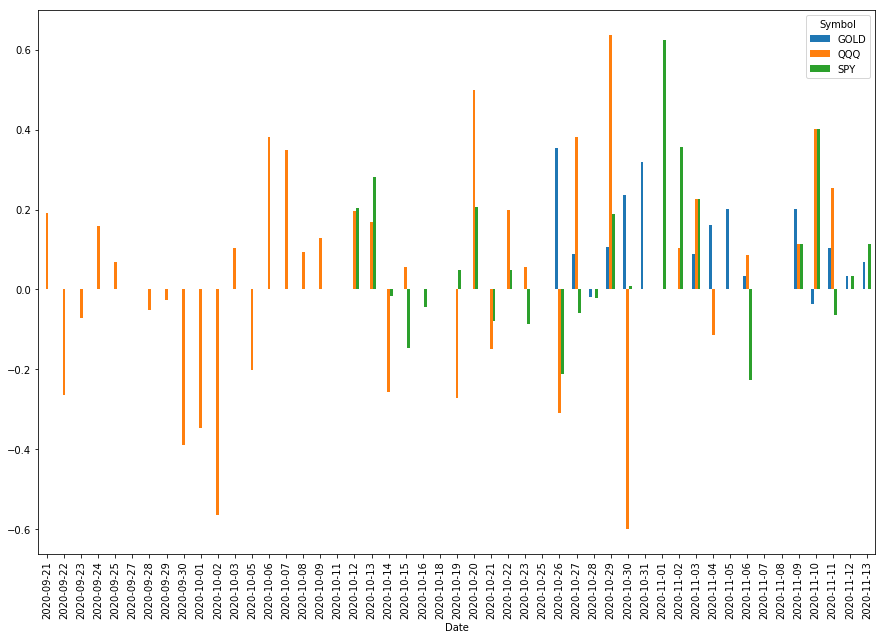

In [14]:
# plot the bar chart
mean_ = df.groupby(['Symbol', 'Date']).mean()
mean_ = mean_.unstack()
mean_ = mean_.xs('Score', axis='columns').transpose()
mean_.plot(kind='bar', figsize=(15,10))
plt.show()

#### Interesting Find: Stocks tend to dip before every election, this chart shows that there were good news before election. 
#### As a result, the S&P 500 Index (SPY) jumped a whoppy 11% before and during the election week.

#### For one stock

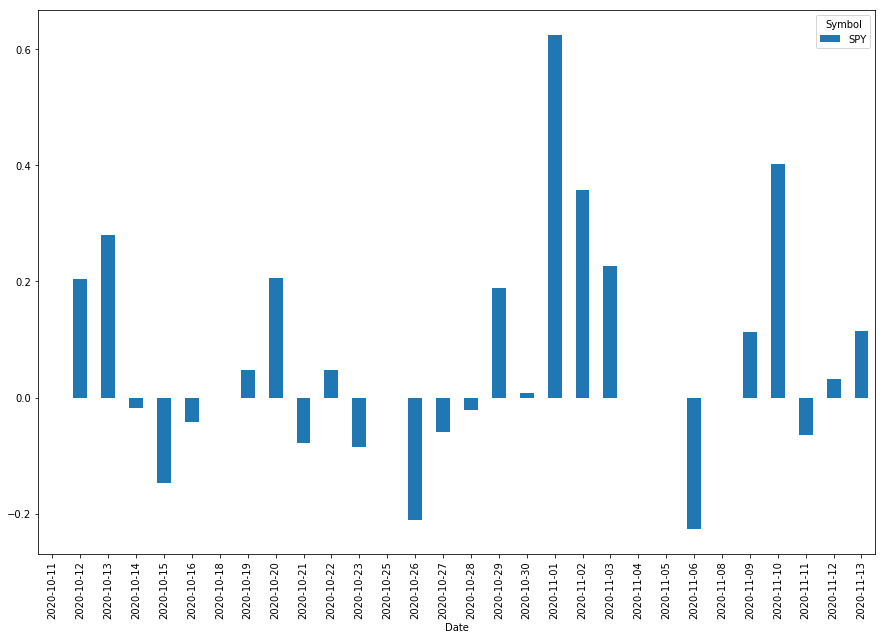

In [15]:
#### Insert any stock ticker to get its sentiment analysis

# insert stock ticker here
tickers = ['SPY']

table_news = {}

for symbol in tickers:
    url = fv_url + symbol
    
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    table_news[symbol] = news_table

parsed_ = []

for symbol, news_table in table_news.items():
    for r in news_table.findAll('tr'):
        contents = r.a.get_text()
        date_ = r.td.text.split(' ')
        
        if len(date_) == 1:
            time = date_[0]
        else:
            date = date_[0]
            time = date_[1]
            
        parsed_.append([symbol, date, time, contents])
        
df = pd.DataFrame(parsed_, columns=['Symbol', 'Date', 'Time', 'Contents'])
df['Score'] = df['Contents'].apply(lambda contents: vader.polarity_scores(contents)['compound'])
df['Date'] = pd.to_datetime(df.Date).dt.date
mean_ = df.groupby(['Symbol', 'Date']).mean()
mean_ = mean_.unstack()
mean_ = mean_.xs('Score', axis='columns').transpose()
mean_.plot(kind='bar', figsize=(15,10))
plt.show()